<img src="https://www.cochezycia.com/resource/1673536318000/ccCochez_B2C_Theme/images/logo_cochez_e.svg" style="width:500px"/>

# <font color='yellow'>Prueba Técnica para Científico de datos.</font>

##  Descripción de los datos
Este conjunto de datos contiene información transaccional de un grupo de 2,500 clientes los cuales son compradores frecuentes en una tienda retail. La historia de los datos es de 2 años.

## Objetivo del análisis
Describir los clientes de la tienda en base a su información transaccional


# Tareas por hacer
1. Describir a los clientes según su frecuencia de compra.
2. Describir a los clientes según el gasto realizado.
3. Describir a los clientes según las variables demográficas.
4. ¿Qué categorías de productos generan aproximadamente el 80% de las ventas?
5. ¿Cuántos clientes generan aproximadamente el 80% de las ventas?
6. ¿Cuál es el periodo o rango semanal donde se registra mayor actividad(transacciones) por parte de los clientes?
7. Cualquier otro insights que se haya descubierto y sea interesante presentar.
8. Sugerencia de posibles desarrollos que se puedan realizar a partir de los datos analizados y de los resultados obtenidos.

# Indicaciones
1. Entregar un notebook(ipynb) con los resultados obtenidos (gráficas, tablas, etc.). También incluir todo el código desarrollado.
2. Sustentar los resultados lo más detallado posible.
3. Explicación detallada de los diferentes descubrimientos que se han encontrado.

# Descripción de las variables
1. transaction_data.csv
    * household_key: Identificación única del cliente.
    * BASKET_ID: Identificación única de la  transacción.
    * PRODUCT_ID: Identificación única del producto.
    * QUANTITY: Cantidad de productos comprados.
    * SALES_VALUE: Monto en dolares de la compra.
    * STORE_ID: Identificación única de cada tienda.
    * WEEK_NO: Semana en que se realizó la transacción (1 - 102)
2. product.csv
    * PRODUCT_ID: Identificación única del producto.
    * MANUFACTURER: Código del proveedor.
    * DEPARTMENT: Departamento al cual pertenece un producto .
    * BRAND: Indica si la marca del producto es internacional o nacional.
    * COMMODITY_DESC:Categoría al que pertenece el producto.
3. hh_demographic.csv
    * AGE_DESC: Rango de edad estimado.
    * MARITAL_STATUS_CODE: Estado marital del cliente.
    * INCOME_DESC: Ingresos del cliente.
    * household_key: ID por cada cliente

## Importacion de Librerias para manejo de datos

In [124]:
import os
import pandas as pd
import seaborn as sn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image


In [125]:
# fecha de ejecución del script
fecha = open("Análisis de Clientes.ipynb", "r+")
print(pd.Timestamp.now())
fecha.close()

2023-03-07 14:24:22.850102


## Importación de los datos 

In [126]:
demografia = pd.read_csv('demographic.csv')
productos = pd.read_csv('product.csv')
transacciones = pd.read_csv('transaction.csv')

## Haremos limpieza del conjunto de datos 

### Convertiremos los archivos csv a un objeto Dataframe para facilitar el manejo de los datos

In [127]:
demog = pd.DataFrame(demografia, columns = [ 'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'household_key'])
product = pd.DataFrame(productos, columns = ['PRODUCT_ID', 'MANUFACTURER', 'DEPARTMENT', 'BRAND', 'COMMODITY_DESC'])
transac = pd.DataFrame(transacciones, columns = ['household_key', 'BASKET_ID', 'PRODUCT_ID', 'QUANTITY', 'SALES_VALUE',
                                                 'STORE_ID', 'WEEK_NO'])

7. Cualquier otro insights que se haya descubierto y sea interesante presentar.

R: A medida que se avance en el proyecto, se descubrirán varios insights interesantes relacionados con lo planteado. Se presentará información adicional sobre cada uno de ellos a medida que sean descubiertos.

### Verificamos que los valores de las columnas no tengas valores erroneos o nulos

In [128]:
#Verificación de valores atípico de los Datos demográficos
demog['AGE_DESC'].unique()
demog['MARITAL_STATUS_CODE'].unique()
demog['INCOME_DESC'].unique()
demog['household_key'].unique()
demog.dropna()
# No se encontraron valores nulos o erróneos en las columnas

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,household_key
0,65+,A,35-49K,1
1,45-54,A,50-74K,7
2,25-34,U,25-34K,8
3,25-34,U,75-99K,13
4,45-54,B,50-74K,16
...,...,...,...,...
796,35-44,U,50-74K,2494
797,45-54,A,75-99K,2496
798,45-54,U,35-49K,2497
799,25-34,U,50-74K,2498


In [129]:
# Verificación de valores atípico de los Datos de  productos
product['PRODUCT_ID'].unique()
product['MANUFACTURER'].unique()
product['DEPARTMENT'].unique()
product['BRAND'].unique()
product['COMMODITY_DESC'].unique()
product.dropna()
# No se encontraron valores nulos o erróneos en las columnas

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC
0,25671,2,GROCERY,National,FRZN ICE
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION
2,26093,69,PASTRY,Private,BREAD
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE
4,26355,69,GROCERY,Private,COOKIES/CONES
...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE
92349,18293439,6393,DRUG GM,National,BOOKSTORE
92350,18293696,6406,DRUG GM,National,BOOKSTORE
92351,18294080,6442,DRUG GM,National,BOOKSTORE


In [130]:
#Verificación de valores atípico de los datos de transacciones
transac['household_key'].unique()
transac['BASKET_ID'].unique()
transac['PRODUCT_ID'].unique()#
transac['QUANTITY'].unique()
transac['SALES_VALUE'].unique()
transac['STORE_ID'].unique()
transac['WEEK_NO'].unique()
transac.dropna()
# No se encontraron valores nulos o erróneos en las columnas

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO
0,2375,26984851472,1004906,1,1.39,364,1
1,2375,26984851472,1033142,1,0.82,364,1
2,2375,26984851472,1036325,1,0.99,364,1
3,2375,26984851472,1082185,1,1.21,364,1
4,2375,26984851472,8160430,1,1.50,364,1
...,...,...,...,...,...,...,...
2595727,1598,42305362535,92130,1,0.99,3228,102
2595728,1598,42305362535,114102,1,8.89,3228,102
2595729,1598,42305362535,133449,1,6.99,3228,102
2595730,1598,42305362535,6923644,1,4.50,3228,102


### Haremos la Unión de los Dataframe para hacer análisis de manera apropiada

In [131]:
# Unión de la tabla transacciones y productos utilizando el ProductID como variable de unión
inner_join = pd.merge(left= transac, right = product,how = "outer", on = "PRODUCT_ID")
inner_join

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC
0,2375.0,2.698485e+10,1004906,1.0,1.39,364.0,1.0,69,PRODUCE,Private,POTATOES
1,1929.0,2.702102e+10,1004906,1.0,1.39,441.0,1.0,69,PRODUCE,Private,POTATOES
2,568.0,2.702109e+10,1004906,1.0,1.39,446.0,1.0,69,PRODUCE,Private,POTATOES
3,887.0,2.703147e+10,1004906,1.0,1.39,298.0,1.0,69,PRODUCE,Private,POTATOES
4,175.0,2.705751e+10,1004906,1.0,1.99,446.0,2.0,69,PRODUCE,Private,POTATOES
...,...,...,...,...,...,...,...,...,...,...,...
2595741,NaN,NaN,8180896,NaN,NaN,NaN,NaN,603,DRUG GM,National,VITAMINS
2595742,NaN,NaN,9887432,NaN,NaN,NaN,NaN,856,DRUG GM,National,DIETARY AID PRODUCTS
2595743,NaN,NaN,12487909,NaN,NaN,NaN,NaN,1628,DRUG GM,National,HALLOWEEN
2595744,NaN,NaN,12605548,NaN,NaN,NaN,NaN,1937,DRUG GM,National,PERSONAL CARE APPLIANCES


In [132]:
# Unión de las 3 tablas: productos, datos demográficos y transacciones por medio de household_key. 
tablas = pd.merge(left= demog , right = inner_join ,how = "outer", on = "household_key")
tablas

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC
0,65+,A,35-49K,1.0,2.874467e+10,1004906,1.0,1.79,436.0,20.0,69,PRODUCE,Private,POTATOES
1,65+,A,35-49K,1.0,2.967219e+10,1004906,1.0,2.49,436.0,28.0,69,PRODUCE,Private,POTATOES
2,65+,A,35-49K,1.0,3.162490e+10,1004906,1.0,2.99,436.0,45.0,69,PRODUCE,Private,POTATOES
3,65+,A,35-49K,1.0,3.181876e+10,1004906,1.0,2.99,436.0,47.0,69,PRODUCE,Private,POTATOES
4,65+,A,35-49K,1.0,3.225983e+10,1004906,1.0,2.49,436.0,52.0,69,PRODUCE,Private,POTATOES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595741,NaN,NaN,NaN,NaN,NaN,8180896,NaN,NaN,NaN,NaN,603,DRUG GM,National,VITAMINS
2595742,NaN,NaN,NaN,NaN,NaN,9887432,NaN,NaN,NaN,NaN,856,DRUG GM,National,DIETARY AID PRODUCTS
2595743,NaN,NaN,NaN,NaN,NaN,12487909,NaN,NaN,NaN,NaN,1628,DRUG GM,National,HALLOWEEN
2595744,NaN,NaN,NaN,NaN,NaN,12605548,NaN,NaN,NaN,NaN,1937,DRUG GM,National,PERSONAL CARE APPLIANCES


In [133]:
# Visualizamos la tabla resultante
tablas

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC
0,65+,A,35-49K,1.0,2.874467e+10,1004906,1.0,1.79,436.0,20.0,69,PRODUCE,Private,POTATOES
1,65+,A,35-49K,1.0,2.967219e+10,1004906,1.0,2.49,436.0,28.0,69,PRODUCE,Private,POTATOES
2,65+,A,35-49K,1.0,3.162490e+10,1004906,1.0,2.99,436.0,45.0,69,PRODUCE,Private,POTATOES
3,65+,A,35-49K,1.0,3.181876e+10,1004906,1.0,2.99,436.0,47.0,69,PRODUCE,Private,POTATOES
4,65+,A,35-49K,1.0,3.225983e+10,1004906,1.0,2.49,436.0,52.0,69,PRODUCE,Private,POTATOES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595741,NaN,NaN,NaN,NaN,NaN,8180896,NaN,NaN,NaN,NaN,603,DRUG GM,National,VITAMINS
2595742,NaN,NaN,NaN,NaN,NaN,9887432,NaN,NaN,NaN,NaN,856,DRUG GM,National,DIETARY AID PRODUCTS
2595743,NaN,NaN,NaN,NaN,NaN,12487909,NaN,NaN,NaN,NaN,1628,DRUG GM,National,HALLOWEEN
2595744,NaN,NaN,NaN,NaN,NaN,12605548,NaN,NaN,NaN,NaN,1937,DRUG GM,National,PERSONAL CARE APPLIANCES


In [134]:
# crear nueva columna para poder identificar el tipo de cliente con datos demográficos y sin datos demográficos 
tablas['Tipo de Cliente'] = tablas['AGE_DESC'].notna()
tablas


,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,Tipo de Cliente
0,65+,A,35-49K,1.0,2.874467e+10,1004906,1.0,1.79,436.0,20.0,69,PRODUCE,Private,POTATOES,True
1,65+,A,35-49K,1.0,2.967219e+10,1004906,1.0,2.49,436.0,28.0,69,PRODUCE,Private,POTATOES,True
2,65+,A,35-49K,1.0,3.162490e+10,1004906,1.0,2.99,436.0,45.0,69,PRODUCE,Private,POTATOES,True
3,65+,A,35-49K,1.0,3.181876e+10,1004906,1.0,2.99,436.0,47.0,69,PRODUCE,Private,POTATOES,True
4,65+,A,35-49K,1.0,3.225983e+10,1004906,1.0,2.49,436.0,52.0,69,PRODUCE,Private,POTATOES,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595741,NaN,NaN,NaN,NaN,NaN,8180896,NaN,NaN,NaN,NaN,603,DRUG GM,National,VITAMINS,False
2595742,NaN,NaN,NaN,NaN,NaN,9887432,NaN,NaN,NaN,NaN,856,DRUG GM,National,DIETARY AID PRODUCTS,False
2595743,NaN,NaN,NaN,NaN,NaN,12487909,NaN,NaN,NaN,NaN,1628,DRUG GM,National,HALLOWEEN,False
2595744,NaN,NaN,NaN,NaN,NaN,12605548,NaN,NaN,NaN,NaN,1937,DRUG GM,National,PERSONAL CARE APPLIANCES,False


In [135]:
# Creamos una tabla llamada verificador para dividir los clientes en 3 secciones
# demográficos, sin datos demográficos y sin ningun dato
tablas['Verificador'] = np.where((tablas['Tipo de Cliente'] == True ),'demográficas','Sin demográficas')
tablas['Verificador'] = np.where((tablas['AGE_DESC'].isnull()) & (tablas['BASKET_ID'].isnull()), 'Sin información', tablas['Verificador'])

In [136]:
# Conteo de los distintos Usuarios
tablas['Verificador'].value_counts()

demográficas        1427303
Sin demográficas    1168429
Sin información          14
Name: Verificador, dtype: int64

In [137]:
usuariosd = tablas.loc[tablas['Verificador'] == 'demográficas']
usuariosnod = tablas.loc[tablas['Verificador'] == 'Sin demográficas']
usuariosnoinfo = tablas.loc[tablas['Verificador'] == 'Sin información']

los clientes van a estar divididos entre los que tienen información demográfica, los que no tienen información demográfica 
y tambien los que no tienen información.
En el contexto del archivo "transaction_data.csv", una transacción se refiere a una compra realizada por un cliente en una tienda determinada en una semana específica (indicada por la variable WEEK_NO).

Cada transacción tiene una identificación única (BASKET_ID) y contiene información sobre los productos comprados (PRODUCT_ID), la cantidad de productos comprados (QUANTITY) y el valor total de la compra en dólares (SALES_VALUE).

Por lo tanto, una transacción representa una única compra que un cliente realiza en una tienda durante una semana determinada. Al analizar las transacciones en conjunto, es posible obtener información valiosa sobre los hábitos de compra de los clientes y las tendencias de ventas en las tienda.

1. Describir a los clientes según su frecuencia de compra.

In [138]:
# Agrupamos los datos por semana y sumamos la cantidad de productos comprados de clientes con datos demograficos
df_agrupado = usuariosd.groupby(['WEEK_NO'])['BASKET_ID'].count().reset_index()
df_agrupado

,WEEK_NO,BASKET_ID
0,1.0,700
1,2.0,1549
2,3.0,1968
3,4.0,2543
4,5.0,3340
...,...,...
97,98.0,17248
98,99.0,17701
99,100.0,15208
100,101.0,15281


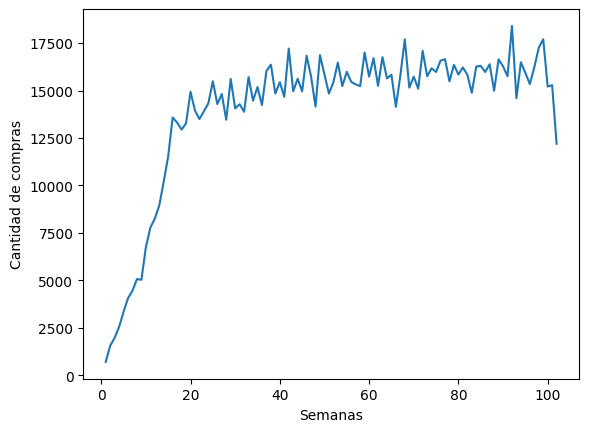

In [139]:
# Creamos un gráfico de línea para mostrar la evolución de las compras a lo largo del tiempo
plt.plot(df_agrupado['WEEK_NO'], df_agrupado['BASKET_ID'])

# Agregamos una etiqueta al eje x y al eje y
plt.xlabel('Semanas')
plt.ylabel('Cantidad de compras')

# Mostramos el gráfico de línea
plt.show()

In [140]:
# Agrupamos los datos por semana y sumamos la cantidad de productos comprados de clientes con datos demográficos
df_agrupados = usuariosnod.groupby(['WEEK_NO'])['BASKET_ID'].count().reset_index()
df_agrupados

,WEEK_NO,BASKET_ID
0,1.0,1181
1,2.0,2126
2,3.0,2835
3,4.0,2836
4,5.0,3828
...,...,...
97,98.0,13905
98,99.0,14555
99,100.0,13694
100,101.0,11332


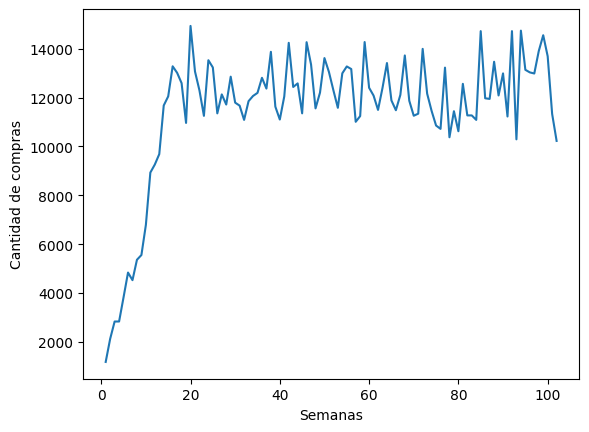

In [141]:
# Creamos un gráfico de línea para mostrar la evolución de las compras a lo largo del tiempo
plt.plot(df_agrupados['WEEK_NO'], df_agrupados['BASKET_ID'])

# Agregamos una etiqueta al eje x y al eje y
plt.xlabel('Semanas')
plt.ylabel('Cantidad de compras')

# Mostramos el gráfico de línea
plt.show()

In [142]:
# Agrupamos los datos por semana y sumamos la cantidad de productos comprados de clientes sin ninguna información
df_agrupadoss = usuariosnoinfo.groupby(['WEEK_NO'])['BASKET_ID'].count().reset_index()
df_agrupadoss

,WEEK_NO,BASKET_ID


In [143]:
# Compras máximas y mínimas deacuerdo a los tipos de usuarios 
a = df_agrupado['BASKET_ID'].max(), df_agrupados['BASKET_ID'].max(), df_agrupadoss['BASKET_ID'].max()
b = df_agrupado['BASKET_ID'].min(), df_agrupados['BASKET_ID'].min(), df_agrupadoss['BASKET_ID'].min()

print("Valores máximos")
print("Demográfico, no demográfico, sin información")
print(a)
print("Valores minimos")
print("Demográfico, no demográfico, sin información")
print(b)

Valores máximos
Demográfico, no demográfico, sin información
(18403, 14936, nan)
Valores minimos
Demográfico, no demográfico, sin información
(700, 1181, nan)


2. Describir a los clientes según el gasto realizado.

Para obtener una descripción completa de los clientes según el gasto realizado, realizaremos un análisis descriptivos, como calcular la cantidad total de gasto por cliente, el promedio de gasto por transacción.


In [144]:
# Identificacion de usuarios junto al monto total gastado de los clientes con datos demográficos
df_gastos = usuariosd.groupby(['household_key'])['SALES_VALUE'].count().reset_index()
print("Cantidad total de gasto por cliente en todas las tiendas con datos demográficos")
df_gastos

Cantidad total de gasto por cliente en todas las tiendas con datos demográficos


,household_key,SALES_VALUE
0,1.0,1727
1,7.0,1286
2,8.0,1979
3,13.0,2348
4,16.0,517
...,...,...
796,2494.0,617
797,2496.0,1489
798,2497.0,1962
799,2498.0,859


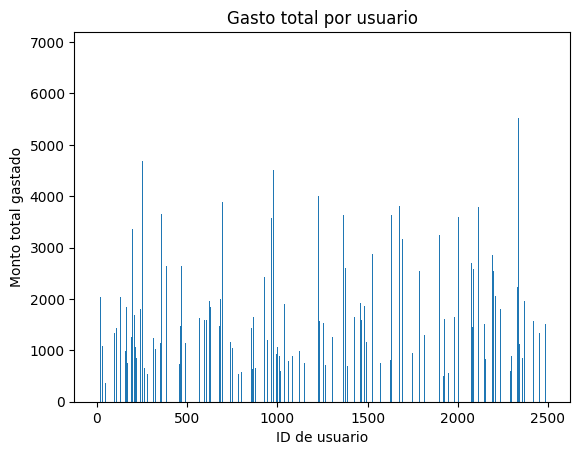

In [145]:
# Grafica de monto total gastado de los clientes con datos demográficos
plt.bar(df_gastos['household_key'], df_gastos['SALES_VALUE'])
plt.xlabel('ID de usuario')
plt.ylabel('Monto total gastado')
plt.title('Gasto total por usuario')
plt.show()

In [146]:
# Promedio de gastos de clientes con datos demográficos en 102 semanas
print("Promedio de gastos realizado por los clientes con datos demográficos en todas las tiendas:")
df_gastos['SALES_VALUE'].mean().__round__()

Promedio de gastos realizado por los clientes con datos demograficos en todas las tiendas:


1782

In [147]:
# Identificación de usuarios junto al monto total gastado de los clientes con datos demográficos
df_gastosn = usuariosnod.groupby(['household_key'])['SALES_VALUE'].count().reset_index()
print("Cantidad total de gasto por cliente en todas las tiendas con datos demográficos")
df_gastosn

Cantidad total de gasto por cliente en todas las tiendas con datos demográficos


,household_key,SALES_VALUE
0,2.0,714
1,3.0,922
2,4.0,301
3,5.0,222
4,6.0,1791
...,...,...
1694,2491.0,360
1695,2492.0,1086
1696,2493.0,837
1697,2495.0,66


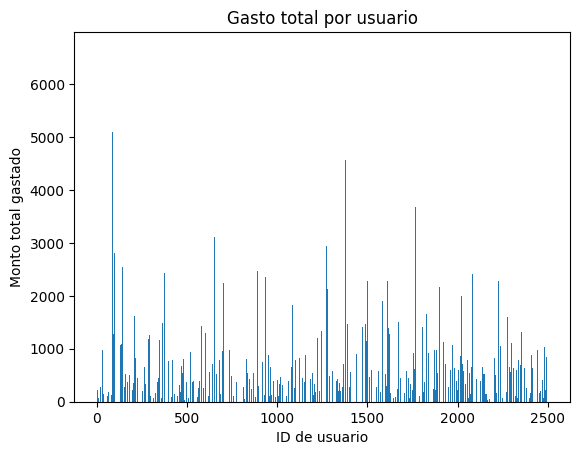

In [148]:
# Gráfica monto total gastado de los clientes sin datos demográficos
plt.bar(df_gastosn['household_key'], df_gastosn['SALES_VALUE'])
plt.xlabel('ID de usuario')
plt.ylabel('Monto total gastado')
plt.title('Gasto total por usuario')
plt.show()

In [174]:
# Promedio de gastos de clientes con datos demográficos en 102 semanas
print("Promedio de gastos realizado por los clientes sin datos demográficos en todas las tiendas:")
df_gastosn['SALES_VALUE'].mean().__round__()

Promedio de gastos realizado por los clientes sin datos demográficos en todas las tiendas:


688

Existen 14 usuarios identificados por la variable household_key, que no cuentan con información suficiente para Análisis

3. Describir a los clientes según las variables demográficas.

Para describir a los clientes según las variables demográficas, podemos utilizar la información del archivo hh_demographic.csv. En particular, las variables que nos permiten categorizar a los clientes según su edad, estado marital e ingresos son AGE_DESC, MARITAL_STATUS_CODE e INCOME_DESC, respectivamente.

In [150]:
# Gastos totales deacuerdo a la edad de los clientes
df_demo_edad = usuariosd.groupby(['AGE_DESC'])['SALES_VALUE'].count().reset_index()
df_demo_edad

,AGE_DESC,SALES_VALUE
0,19-24,75206
1,25-34,249829
2,35-44,386327
3,45-54,520586
4,55-64,91498
5,65+,103857


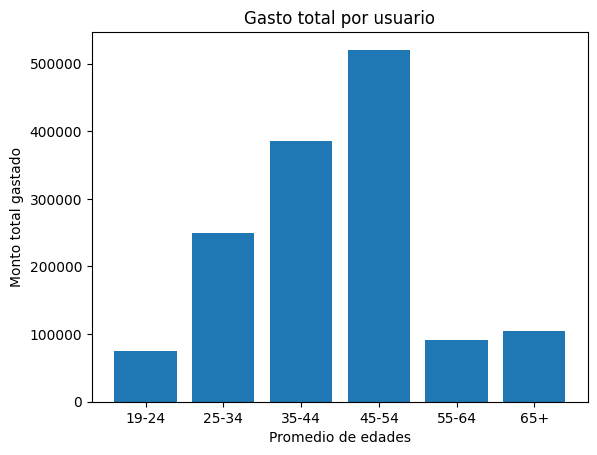

In [151]:
# Gráfica de gastos totales en las tiendas de acuerdo a la edad de los clientes
plt.bar(df_demo_edad['AGE_DESC'], df_demo_edad['SALES_VALUE'])
plt.xlabel('Promedio de edades')
plt.ylabel('Monto total gastado')
plt.title('Gasto total por usuario')
plt.show()

Definición de las letras según Public Health Information Network Vocabulary Access and Distribution System (PHIN VADS)
 
 A = Separate: Separación significa que usted vive separado de su cónyuge pero sigue legalmente
     casado hasta que obtenga una sentencia de divorcio.

 U = Unknown: Desconocido.

 B = Unmarried: Soltería es el estado civil, con reconocimiento legal, en el que se encuentra aquella
     persona que no tiene cónyuge.

In [152]:
# Gastos totales deacuerdo a la edad de los clientes
df_demo_sm = usuariosd.groupby(['MARITAL_STATUS_CODE'])['SALES_VALUE'].count().reset_index()
df_demo_sm

,MARITAL_STATUS_CODE,SALES_VALUE
0,A,641796
1,B,193526
2,U,591981


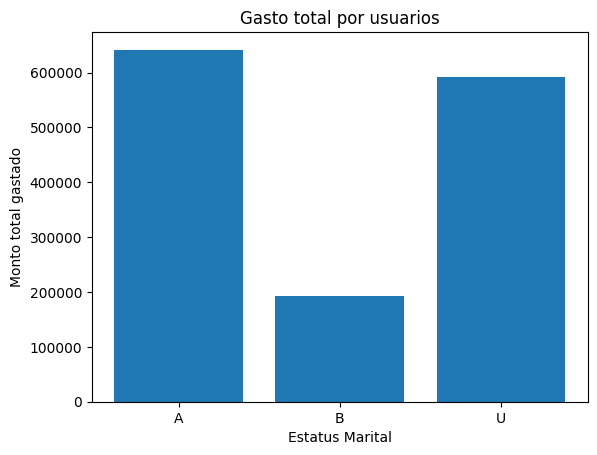

In [153]:
# Gráfica de gastos totales en las tiendas de acuerdo al estatus marital de los clientes
plt.bar(df_demo_sm['MARITAL_STATUS_CODE'], df_demo_sm['SALES_VALUE'])
plt.xlabel('Estatus Marital')
plt.ylabel('Monto total gastado')
plt.title('Gasto total por usuarios')
plt.show()

In [154]:
# Gastos totales deacuerdo a la edad de los clientes
df_demo_in = usuariosd.groupby(['INCOME_DESC'])['SALES_VALUE'].count().reset_index()
df_demo_in

,INCOME_DESC,SALES_VALUE
0,100-124K,59480
1,125-149K,88004
2,15-24K,104112
3,150-174K,71330
4,175-199K,25673
5,200-249K,7878
6,25-34K,128678
7,250K+,32026
8,35-49K,278341
9,50-74K,348536


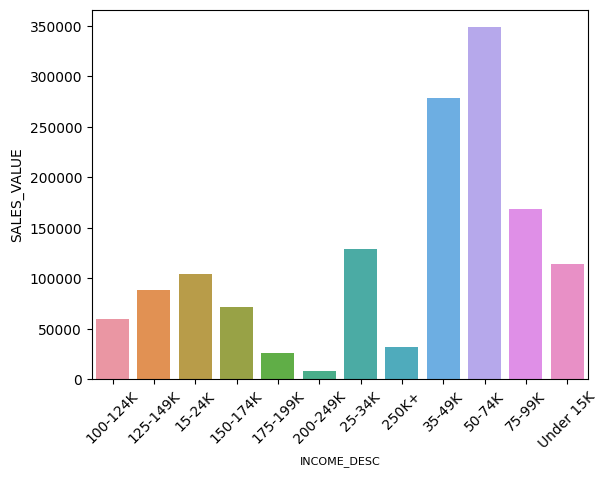

<Figure size 1400x1100 with 0 Axes>

In [155]:
# Gráfica de gastos totales en las tiendas de acuerdo al estatus promedio de sueldos de los clientes
df = df_demo_in
grafica = sns.barplot(x='INCOME_DESC', y='SALES_VALUE', data=df)
grafica.set_xticklabels(grafica.get_xticklabels(), rotation=45)
grafica.set_xlabel('INCOME_DESC', fontsize=8)
plt.figure(figsize=(14, 11))
plt.show()

4. ¿Qué categorías de productos generan aproximadamente el 80% de las ventas?

Categorías de productos generan aproximadamente el 80% de las ventas?

In [156]:
 # Calcular el monto total de ventas por categoría de clientes con datos demograficos
sales_by_category_d  = usuariosd.groupby('COMMODITY_DESC')['SALES_VALUE'].sum().sort_index().to_frame()
sales_by_category_d

,SALES_VALUE
COMMODITY_DESC,
,0.00
(CORP USE ONLY),175.25
ADULT INCONTINENCE,3198.64
AIR CARE,9765.12
ANALGESICS,14081.40
...,...
WAREHOUSE SNACKS,8961.31
WATCHES/CALCULATORS/LOBBY,134.64
WATER,1809.35


In [157]:
# Ordenar las categorías por el monto de ventas en orden descendente
sales_by_category = sales_by_category_d.sort_values('SALES_VALUE', ascending=False)

In [158]:
# Calcular el porcentaje acumulado de las ventas por categoría
cumulative_sales_percent = (sales_by_category.cumsum() / sales_by_category.sum()) * 100
cumulative_sales_percent

,SALES_VALUE
COMMODITY_DESC,
COUPON/MISC ITEMS,8.898193
SOFT DRINKS,12.759315
BEEF,16.445675
FLUID MILK PRODUCTS,18.942820
CHEESE,21.252814
...,...
BOTTLE DEPOSITS,99.999774
MISCELLANEOUS CROUTONS,99.999916
MISCELLANEOUS(CORP USE ONLY),99.999967


In [159]:
# Identificar las categorías que suman aproximadamente el 80% de las ventas totales de los clientes con datos demograficos
top_categories = cumulative_sales_percent[cumulative_sales_percent <= 80].index.tolist()
top_categories

['COUPON/MISC ITEMS',
 'SOFT DRINKS',
 'BEEF',
 'FLUID MILK PRODUCTS',
 'CHEESE',
 'FRZN MEAT/MEAT DINNERS',
 'BAKED BREAD/BUNS/ROLLS',
 'BEERS/ALES',
 'BAG SNACKS',
 'FROZEN PIZZA',
 'DELI MEATS',
 'COLD CEREAL',
 'CIGARETTES',
 'CHICKEN',
 'SOUP',
 'LUNCHMEAT',
 'PORK',
 'ICE CREAM/MILK/SHERBTS',
 'CANDY - PACKAGED',
 'CANNED JUICES',
 'REFRGRATD JUICES/DRNKS',
 'COFFEE',
 'DOMESTIC WINE',
 'CRACKERS/MISC BKD FD',
 'YOGURT',
 'WATER - CARBONATED/FLVRD DRINK',
 'BATH TISSUES',
 'DOG FOODS',
 'DIAPERS & DISPOSABLES',
 'VEGETABLES - SHELF STABLE',
 'CONVENIENT BRKFST/WHLSM SNACKS',
 'CHEESES',
 'MEAT - MISC',
 'SEAFOOD - FROZEN',
 'LAUNDRY DETERGENTS',
 'COOKIES/CONES',
 'BAKED SWEET GOODS',
 'MEAT - SHELF STABLE',
 'SALAD MIX',
 'HAIR CARE PRODUCTS',
 'HISPANIC',
 'SALD DRSNG/SNDWCH SPRD',
 'POTATOES',
 'FROZEN MEAT',
 'FD WRAPS/BAGS/TRSH BG',
 'FRZN VEGETABLE/VEG DSH',
 'REFRGRATD DOUGH PRODUCTS',
 'BACON',
 'BREAKFAST SAUSAGE/SANDWICHES',
 'MILK BY-PRODUCTS',
 'TROPICAL FRUIT',
 'DIN

In [160]:
# Calcular el monto total de ventas por categoría de clientes sin datos demográficos
sales_by_category_nod  = usuariosnod.groupby('COMMODITY_DESC')['SALES_VALUE'].sum().sort_index().to_frame()
sales_by_category_nod

,SALES_VALUE
COMMODITY_DESC,
,0.00
(CORP USE ONLY),108.15
ADULT INCONTINENCE,1797.33
AIR CARE,7934.19
ANALGESICS,11344.81
...,...
WAREHOUSE SNACKS,6887.18
WATCHES/CALCULATORS/LOBBY,124.11
WATER,2095.04


In [161]:
# Ordenar las categorías por el monto de ventas en orden descendente de los clientes sin datos demográficos
sales_by_category = sales_by_category_nod.sort_values('SALES_VALUE',ascending=False)
sales_by_category

,SALES_VALUE
COMMODITY_DESC,
COUPON/MISC ITEMS,239663.07
SOFT DRINKS,153985.00
BEEF,146301.19
FLUID MILK PRODUCTS,93041.58
CHEESE,85631.19
...,...
RW FRESH PROCESSED MEAT,27.54
FROZEN PACKAGE MEAT,12.99
BULK FOODS,12.08


In [162]:
# Calcular el porcentaje acumulado de las ventas por categoría
cumulative_sales_percent = (sales_by_category.cumsum() / sales_by_category.sum()) * 100
cumulative_sales_percent

,SALES_VALUE
COMMODITY_DESC,
COUPON/MISC ITEMS,6.732588
SOFT DRINKS,11.058317
BEEF,15.168193
FLUID MILK PRODUCTS,17.781906
CHEESE,20.187448
...,...
RW FRESH PROCESSED MEAT,99.999061
FROZEN PACKAGE MEAT,99.999426
BULK FOODS,99.999765


In [163]:
# Identificar las categorías que suman aproximadamente el 80% de las ventas totales de los clientes con datos demográficos
top_categories = cumulative_sales_percent[cumulative_sales_percent <= 80].index.tolist()
top_categories

['COUPON/MISC ITEMS',
 'SOFT DRINKS',
 'BEEF',
 'FLUID MILK PRODUCTS',
 'CHEESE',
 'FROZEN PIZZA',
 'FRZN MEAT/MEAT DINNERS',
 'BAG SNACKS',
 'BEERS/ALES',
 'BAKED BREAD/BUNS/ROLLS',
 'COLD CEREAL',
 'LUNCHMEAT',
 'DELI MEATS',
 'PORK',
 'CHICKEN',
 'CIGARETTES',
 'SOUP',
 'ICE CREAM/MILK/SHERBTS',
 'MEAT - MISC',
 'REFRGRATD JUICES/DRNKS',
 'CANNED JUICES',
 'CANDY - PACKAGED',
 'SEAFOOD - FROZEN',
 'WATER - CARBONATED/FLVRD DRINK',
 'INFANT FORMULA',
 'CRACKERS/MISC BKD FD',
 'COFFEE',
 'BATH TISSUES',
 'MEAT - SHELF STABLE',
 'BAKED SWEET GOODS',
 'DIAPERS & DISPOSABLES',
 'FROZEN MEAT',
 'COOKIES/CONES',
 'VEGETABLES - SHELF STABLE',
 'LAUNDRY DETERGENTS',
 'DOMESTIC WINE',
 'DINNER MXS:DRY',
 'YOGURT',
 'CONVENIENT BRKFST/WHLSM SNACKS',
 'HISPANIC',
 'SALD DRSNG/SNDWCH SPRD',
 'DINNER SAUSAGE',
 'BREAKFAST SAUSAGE/SANDWICHES',
 'CONDIMENTS/SAUCES',
 'BACON',
 'CHEESES',
 'CAKES',
 'POTATOES',
 'DOG FOODS',
 'REFRGRATD DOUGH PRODUCTS',
 'HAIR CARE PRODUCTS',
 'FRZN NOVELTIES/WTR IC

¿Cuántos clientes generan aproximadamente el 80% de las ventas?

In [164]:
# Clientes con datos demográficos que generan el 80% de las ventas
# Calcular el monto total de ventas por cliente
sales_by_customer = usuariosd.groupby('household_key')['SALES_VALUE'].sum()
sales_by_customer

household_key
1.0        4330.16
7.0        3400.05
8.0        5534.97
13.0      13190.92
16.0       1512.02
            ...   
2494.0     2120.93
2496.0     4339.66
2497.0     7111.98
2498.0     2601.60
2499.0     3394.07
Name: SALES_VALUE, Length: 801, dtype: float64

In [165]:
# Ordenar los clientes por el monto de ventas
sales_by_customer = sales_by_customer.sort_values(ascending=False)
sales_by_customer

household_key
1609.0    27859.68
2322.0    23646.92
1453.0    21661.29
1430.0    20352.99
718.0     19299.86
            ...   
1429.0      818.56
1604.0      818.41
460.0       760.45
1135.0      748.88
593.0       646.40
Name: SALES_VALUE, Length: 801, dtype: float64

In [166]:
# Calcular el porcentaje acumulado de las ventas por cliente
cumulative_sales_percent = (sales_by_customer.cumsum() / sales_by_customer.sum()) * 100
cumulative_sales_percent

household_key
1609.0      0.619418
2322.0      1.145172
1453.0      1.626779
1430.0      2.079297
718.0       2.508401
             ...    
1429.0     99.933874
1604.0     99.952071
460.0      99.968978
1135.0     99.985628
593.0     100.000000
Name: SALES_VALUE, Length: 801, dtype: float64

In [167]:
# Identificar el número de clientes que suman aproximadamente el 80% de las ventas totales
num_top_customers = cumulative_sales_percent[cumulative_sales_percent <= 80].count()
num_top_customers

462

In [168]:

# Clientes sin datos demográficos que generan el 80% de las ventas
# Calcular el monto total de ventas por cliente
sales_by_customer = usuariosnod.groupby('household_key')['SALES_VALUE'].sum()
sales_by_customer

household_key
2.0       1954.34
3.0       2653.21
4.0       1200.11
5.0        779.06
6.0       5996.16
           ...   
2491.0     950.77
2492.0    2858.85
2493.0    2588.73
2495.0     209.00
2500.0    5486.16
Name: SALES_VALUE, Length: 1699, dtype: float64

In [169]:
# Ordenar los clientes por el monto de ventas
sales_by_customer = sales_by_customer.sort_values(ascending=False)
sales_by_customer

household_key
1023.0    38319.79
2459.0    20671.50
1111.0    18894.72
328.0     17332.13
1489.0    17251.53
            ...   
522.0        29.34
689.0        28.96
2201.0       27.51
1897.0       19.58
494.0         8.17
Name: SALES_VALUE, Length: 1699, dtype: float64

In [170]:
# Calcular el porcentaje acumulado de las ventas por cliente
cumulative_sales_percent = (sales_by_customer.cumsum() / sales_by_customer.sum()) * 100
cumulative_sales_percent

household_key
1023.0      1.076475
2459.0      1.657177
1111.0      2.187965
328.0       2.674857
1489.0      3.159485
             ...    
522.0      99.997634
689.0      99.998448
2201.0     99.999220
1897.0     99.999770
494.0     100.000000
Name: SALES_VALUE, Length: 1699, dtype: float64

In [171]:
# Identificar el número de clientes que suman aproximadamente el 80% de las ventas totales
num_top_customers = cumulative_sales_percent[cumulative_sales_percent <= 80].count()
num_top_customers

756

6. ¿Cuál es el periodo o rango semanal donde se registra mayor actividad(transacciones) por parte de los clientes?

Para determinar el periodo o rango semanal donde se registra mayor actividad (transacciones) por parte de los clientes, se puede utilizar la columna "WEEK_NO" del archivo "transaction_data.csv". Para ello, se puede calcular la cantidad de transacciones por semana y luego determinar la semana con el mayor número de transacciones.

La semana con mayor cantidad de transacciones es la semana 92.0.


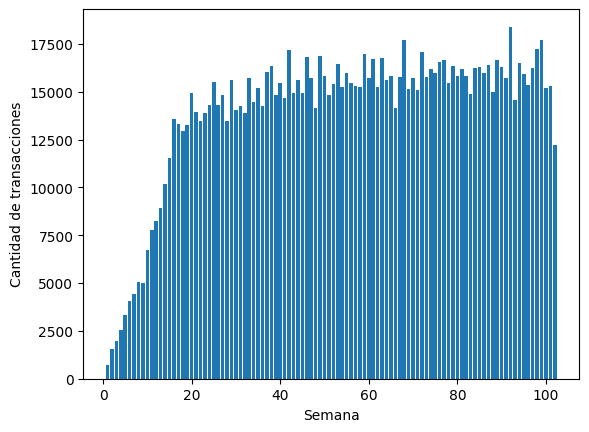

In [172]:
#rango semanal donde se registra mayor actividad de acuerdo a los clientes con datos demográficos
# Calcular la cantidad de transacciones por semana
transactions_by_week = usuariosd.groupby("WEEK_NO").size()

# Encontrar la semana con el mayor número de transacciones
max_week = transactions_by_week.idxmax()

# Mostrar el resultado
print(f"La semana con mayor cantidad de transacciones es la semana {max_week}.")

# Crear un gráfico de barras para visualizar la cantidad de transacciones por semana
plt.bar(transactions_by_week.index, transactions_by_week.values)
plt.xlabel("Semana")
plt.ylabel("Cantidad de transacciones")
plt.show()

La semana con mayor cantidad de transacciones es la semana 20.0.


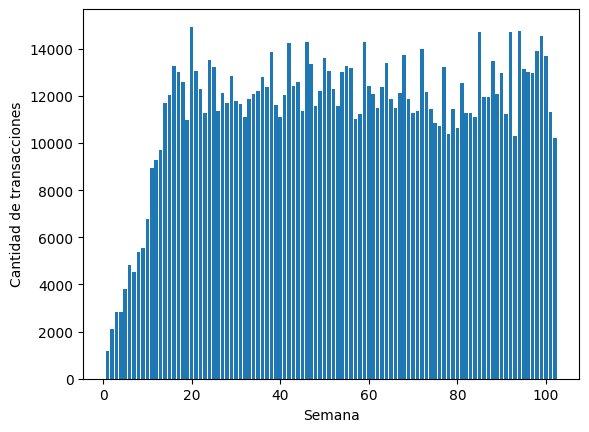

In [173]:
#rango semanal donde se registra mayor actividad de acuerdo a los clientes sin datos demográficos
# Calcular la cantidad de transacciones por semana
transactions_by_week = usuariosnod.groupby("WEEK_NO").size()

# Encontrar la semana con el mayor número de transacciones
max_week = transactions_by_week.idxmax()

# Mostrar el resultado
print(f"La semana con mayor cantidad de transacciones es la semana {max_week}.")

# Crear un gráfico de barras para visualizar la cantidad de transacciones por semana
plt.bar(transactions_by_week.index, transactions_by_week.values)
plt.xlabel("Semana")
plt.ylabel("Cantidad de transacciones")
plt.show()

8. Sugerencia de posibles desarrollos que se puedan realizar a partir de los datos analizados y de los resultados obtenidos.

 Teniendo en cuenta los datos analizados y los resultados obtenidos, se pueden sugerir varios desarrollos que podrían mejorar el desempeño del negocio:

a. Realizar análisis estadísticos detallados para resolver problemas relacionados con las ventas y los clientes, incluso aquellos que no estén registrados. De esta manera, se pueden identificar patrones de compra y preferencias de los clientes que permitan ajustar las estrategias de venta.

b. Utilizar la información de los clientes para mejorar las campañas de marketing. Al entender las fechas en las que los clientes compraron más, se pueden diseñar campañas de promoción que ofrezcan los productos que más demandan. De esta manera, se puede incrementar la fidelidad de los clientes y aumentar las ventas.

c. Utilizar los datos de ventas para identificar los productos con menor demanda y ahorrar en ellos. Al mismo tiempo, se pueden enfocar los esfuerzos de marketing en promocionar y vender los productos con mayor demanda. De esta manera, se pueden reducir costos y aumentar los ingresos.

d. Analizar el mercado local y ofrecer promociones en línea de los productos con mayor demanda. Esto permitiría llegar a más clientes y aumentar las ventas en línea.

En resumen, los datos analizados ofrecen una gran cantidad de información que se puede utilizar para mejorar el desempeño del negocio. Al realizar análisis estadísticos y utilizar la información de los clientes y las ventas, se pueden identificar oportunidades de mejora y ajustar las estrategias para obtener mejores resultados.